## ALLURE Chatbot Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("words")


[nltk_data] Downloading package words to
[nltk_data]     /Users/kausiklakkaraju/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
data = pd.read_csv('../../data/real-world/allure/final/final.csv')

In [15]:
data.head()

,C_num,UB,User_gender,Text
0,1,0,0,"Hello, welcome to ALLURE! I'm Ally and I want ..."
1,1,0,0,Today we'll learn the different moves you need...
2,1,0,0,Would you like to hear more about the white c...
3,1,1,0,Level 1
4,1,0,0,Level: 1


In [16]:
# Each turn is a series of user-chatbot utterances.
data_groups = data.groupby('C_num')

# Calculate the difference between consecutive rows. If it is 1, calculate the number of times this difference is 1.
num_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum())
avg_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum()).mean()

print("C_num denotes conversation number.")
print(num_dialogues)

print("The average number of turns are: ")
print(round(avg_dialogues,2))

C_num denotes conversation number.
C_num
1     18
2     21
3     30
4     49
5     71
6     22
7     41
8     33
9     37
10    29
11    22
12    27
13    20
14     5
15    27
16    30
17    28
18    33
Name: UB, dtype: int64
The average number of turns are: 
30.17


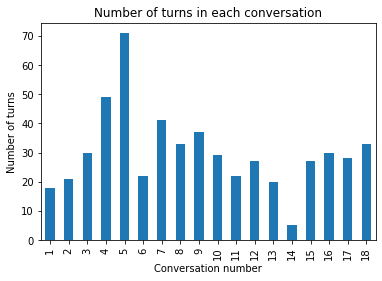

In [17]:
# Draw a graph
num_dialogues.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of turns')
plt.title('Number of turns in each conversation')
plt.show()

In [18]:
data_groups = data.groupby('C_num')
bot_utterances = data_groups['UB'].apply(lambda x: (x == 0).sum())
bot_utterances_avg = data_groups['UB'].apply(lambda x: (x == 0).sum()).mean()
user_utterances = data_groups['UB'].apply(lambda x: (x == 1).sum())
user_utterances_avg = data_groups['UB'].apply(lambda x: (x == 1).sum()).mean()


print("C_num denotes conversation number.")
print("Number of bot utterances in each conversation: ")
print(bot_utterances)
print("Average number of bot utterances are: ")
print(round(bot_utterances_avg,2))


C_num denotes conversation number.
Number of bot utterances in each conversation: 
C_num
1      75
2      88
3     120
4     188
5     277
6      90
7     169
8     120
9     153
10    115
11     89
12    102
13     83
14     16
15    115
16     98
17    107
18    109
Name: UB, dtype: int64
Average number of bot utterances are: 
117.44


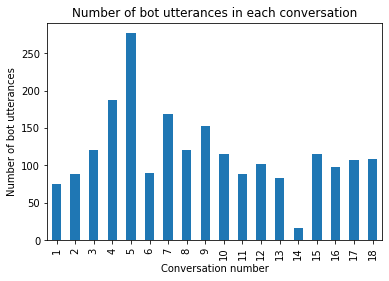

In [19]:
bot_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of bot utterances')
plt.title('Number of bot utterances in each conversation')
plt.show()

In [20]:
print("Number of user utterances in each conversation: ")
print(user_utterances)
print("Average number of user utterances are: ")
print(round(user_utterances_avg,2))

Number of user utterances in each conversation: 
C_num
1     18
2     23
3     32
4     83
5     83
6     22
7     42
8     36
9     43
10    38
11    22
12    27
13    20
14     7
15    27
16    35
17    29
18    39
Name: UB, dtype: int64
Average number of user utterances are: 
34.78


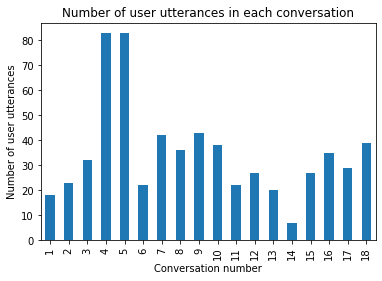

In [21]:
user_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of user utterances')
plt.title('Number of user utterances in each conversation')
plt.show()

In [22]:
data0 = data[data['UB'] == 0]
data1 = data[data['UB'] == 1]

In [23]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [24]:
print("Average number of stopwords used by the chatbot: ")
print(data0['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by the user: ")
print(data1['Text'].apply(count_stop_words).mean())

Average number of stopwords used by the chatbot: 
5.581362346263009
Average number of stopwords used by the user: 
0.01437699680511182


In [25]:
def count_words(text):
    return len(str(text).split())

In [26]:
print("Average number of words in each utterance of the chatbot: ")
print(data0['Text'].apply(count_words).mean())
print("Average number of words in each utterance of the user: ")
print(data1['Text'].apply(count_words).mean())

Average number of words in each utterance of the chatbot: 
12.793755912961212
Average number of words in each utterance of the user: 
3.515974440894569


In [41]:
## Number of average utterances
data_groups = data.groupby('C_num')
male_utterances = data_groups['User_gender'].apply(lambda x: (x == 1).sum())
male_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 1).sum()).sum() / 9
female_utterances = data_groups['User_gender'].apply(lambda x: (x == 2).sum())
female_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 2).sum()).sum() / 8
na_utterances = data_groups['User_gender'].apply(lambda x: (x == 0).sum())
na_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 0).sum()).sum() / 1

print("C_num denotes conversation number.")

print("Number of male utterances in each conversation: ")
print(male_utterances)
print("Average number of male utterances are: ")
print(round(male_utterances_avg,2))

C_num denotes conversation number.
Number of male utterances in each conversation: 
C_num
1       0
2     111
3       0
4     271
5       0
6     112
7       0
8     156
9     196
10    153
11      0
12      0
13      0
14      0
15      0
16    133
17    136
18    148
Name: User_gender, dtype: int64
Average number of male utterances are: 
157.33


In [42]:
print("Number of female utterances in each conversation: ")
print(female_utterances)
print("Average number of female utterances are: ")
print(round(female_utterances_avg,2))

Number of female utterances in each conversation: 
C_num
1       0
2       0
3     152
4       0
5     360
6       0
7     211
8       0
9       0
10      0
11    111
12    129
13    103
14     23
15    142
16      0
17      0
18      0
Name: User_gender, dtype: int64
Average number of female utterances are: 
153.88


In [43]:
print("Number of NA utterances in each conversation: ")
print(na_utterances)
print("Average number of NA utterances are: ")
print(round(na_utterances_avg,2))

Number of NA utterances in each conversation: 
C_num
1     93
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
Name: User_gender, dtype: int64
Average number of NA utterances are: 
93.0


In [44]:
data0 = data[data['User_gender'] == 0]
data1 = data[data['User_gender'] == 1]
data2 = data[data['User_gender'] == 2]

In [45]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [46]:
print("Average number of stopwords used by NA users: ")
print(data0['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by male users: ")
print(data1['Text'].apply(count_stop_words).mean())
print("Average number of stopwords used by female users: ")
print(data2['Text'].apply(count_stop_words).mean())

Average number of stopwords used by NA users: 
4.236559139784946
Average number of stopwords used by male users: 
4.237288135593221
Average number of stopwords used by female users: 
4.3980503655564585


In [47]:
def count_words(text):
    return len(str(text).split())

In [51]:
print("Average number of words used by NA users: ")
print(data0['Text'].apply(count_words).mean())
print("Average number of words used by male users: ")
print(data1['Text'].apply(count_words).mean())
print("Average number of words used by female users: ")
print(data2['Text'].apply(count_words).mean())

Average number of words used by NA users: 
10.096774193548388
Average number of words used by male users: 
10.584039548022599
Average number of words used by female users: 
10.821283509341999
